# EmoNet: Advanced Emotion Classification Using NLP Techniques
## Problem Statement:

Create an advanced emotion classification model leveraging state-of-the-art Natural Language Processing (NLP) techniques to accurately identify and categorize emotions expressed in textual data. The objective is to develop a model capable of effectively predicting the emotional sentiment associated with each document in a given dataset. This entails training the model on a diverse corpus of documents annotated with corresponding emotion labels and optimizing its performance to achieve high accuracy and robustness in classifying emotions across various contexts. The resulting model should exhibit superior capabilities in understanding and interpreting nuanced emotional nuances, enabling its application in a wide range of real-world scenarios such as sentiment analysis, customer feedback analysis, and mood detection in conversational interfaces.

## Aim:

- Develop a high-performing emotion classification model using NLP techniques to accurately categorize emotions expressed in textual data.

## Dataset Attributes

- Text Data: Each entry contains a piece of text representing a statement or expression of emotion. These textual documents vary in length and content, reflecting the diverse range of emotional experiences.

- Emotion Label: The emotion label indicates the predominant emotion conveyed in the corresponding text data. Emotions such as sorrow, rage, happiness, amaze, care, and scare are represented in the dataset.

# Load Dataset

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,roc_curve,auc
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
import string
from imblearn.over_sampling import RandomOverSampler

In [68]:
#downloading stopwords corpus and Punkt tokenizer models for stopwords removal ad tokenization
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumarip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumarip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
# Load the dataset
emotion_det_df=pd.read_csv('C:\\Users\\kumarip\\Documents\\Priya\\final\\final\\Problem2\\data\\train.csv')
emotion_det_df.head()

,Text,Emotion
0,i didnt feel humiliated,sorrow
1,i can go from feeling so hopeless to so damned...,sorrow
2,im grabbing a minute to post i feel greedy wrong,rage
3,i am ever feeling nostalgic about the fireplac...,care
4,i am feeling grouchy,rage


# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

# Question 1 : Data Analysis (10 pt)

- Describe the dataset, including the number of entries (documents) present.
- Determine the frequency of each emotion category in the dataset.
- Utilize visualizations such as bar charts or pie charts to display the distribution of emotions in the dataset.
- Interpret the statistical plots to extract meaningful insights that can inform the development of the EmoNet model.

In [18]:
emotion_det_df.shape

(15000, 2)

> There are 15000 entries present with 2 columns 'Text' and 'Emotion'

In [19]:
emotion_det_df['Emotion'].unique()

array(['sorrow', 'rage', 'care', 'amaze', 'scare', 'happiness'],
      dtype=object)

>'sorrow', 'rage', 'care', 'amaze', 'scare' and 'happiness' are unique categories of emotions present

In [20]:
emotion_det_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     15000 non-null  object
 1   Emotion  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [21]:
emotion_det_df.isnull().sum()

Text       0
Emotion    0
dtype: int64

> There are no null values present

In [22]:
emotion_det_df['Emotion'].value_counts()

Emotion
happiness    5034
sorrow       4368
rage         2016
scare        1817
care         1223
amaze         542
Name: count, dtype: int64

>The above provides the distribution of emotions in the dataset,indicating how frequently each emotion occurs.

<Axes: xlabel='Emotion', ylabel='count'>

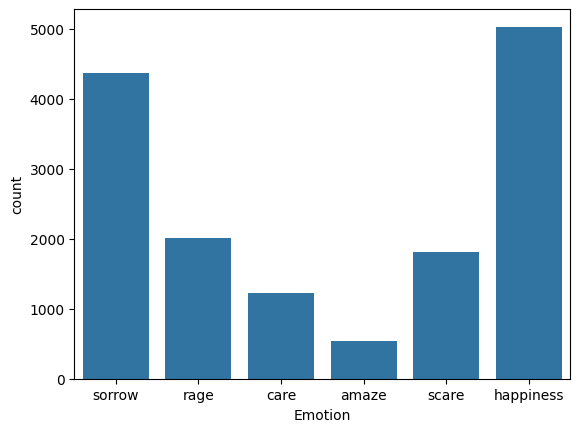

In [23]:
# The below displays the distribution of emotions in the database
sns.countplot(x='Emotion', data=emotion_det_df)

> The above observation indicates an imbalanced distribution of the target variable, suggesting the need to employ techniques such as oversampling to balance the dataset.

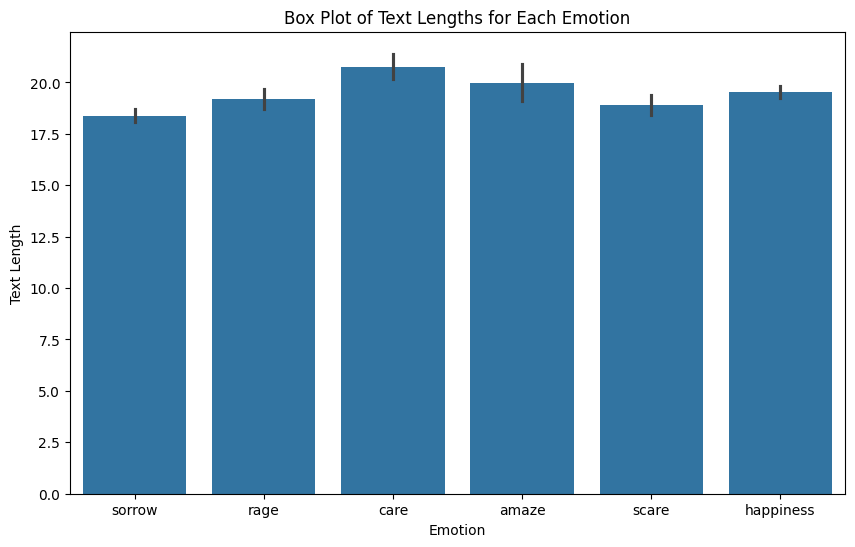

In [24]:
# Calculate text lengths
emotion_len_df= emotion_det_df.copy()  #copying only for visualisation
emotion_len_df['Text_Length'] = emotion_len_df['Text'].apply(lambda x: len(x.split()))

# Bar plot of Text Lengths for Each Emotion
plt.figure(figsize=(10, 6))
sns.barplot(x='Emotion', y='Text_Length', data=emotion_len_df)
plt.title('Box Plot of Text Lengths for Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Text Length')
plt.show()

>'Care' emotion has maximum text length, followed by  'amaze' and 'happiness'

In [25]:
# Analyse the most frequent words in each emotions.
stop_words = set(stopwords.words('english'))
#below are the words used in all the emotions, remove these to get more insights
custom_stop_words = set(["feel", "feeling", "like",'im','would','get','really','know','ive','even','think','time'])
stop_words.update(custom_stop_words)

emotion_words = {}
for emotion in emotion_det_df['Emotion'].unique():
    text = ' '.join(emotion_det_df[emotion_det_df['Emotion'] == emotion]['Text'])
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(10)   #top 10 most common words
    emotion_words[emotion] = most_common_words
for emotion, words in emotion_words.items():
    print(f"Most common words for {emotion}:")
    for word, count in words:
        print(f"{word}: {count}")
    print()

Most common words for sorrow:
still: 183
little: 173
life: 166
people: 165
want: 164
bit: 163
one: 162
dont: 151
things: 149
much: 138

Most common words for rage:
people: 99
little: 98
want: 85
angry: 82
things: 77
way: 76
one: 74
could: 74
bit: 72
dont: 66

Most common words for care:
love: 87
loving: 65
sweet: 65
passionate: 62
caring: 61
one: 60
want: 59
sympathetic: 53
feelings: 53
little: 52

Most common words for amaze:
amazed: 66
impressed: 56
surprised: 55
overwhelmed: 55
weird: 54
curious: 51
funny: 44
strange: 43
shocked: 43
little: 41

Most common words for scare:
little: 138
bit: 111
people: 79
want: 78
still: 76
strange: 74
nervous: 71
terrified: 69
going: 68
anxious: 67

Most common words for happiness:
make: 204
want: 193
people: 192
good: 185
love: 181
one: 179
little: 176
something: 176
going: 176
pretty: 176



>The analysis provides valuable insights into the most frequent words associated with each emotion category, enhancing our understanding of the dataset and enabling a more accurate interpretation of the data.

# Question 2: Data pre-processing & Feature Engineering (10 points)

- Preprocess the text data to remove noise and irrelevant information, such as punctuation, special characters, and stop words.
- Perform tokenization to break down the text data into individual words or tokens.
- Using the provided dataset, create a word cloud to visualize the frequency of words in the text. Describe the process you followed to create the word cloud.
- Experiment with different text representation techniques, such as frequency vector, TF-IDF (Term Frequency-Inverse Document Frequency)to transform the text data into numerical features that can be used by machine learning models.
### Extra credit if you perform word embeddings (e.g., Word2Vec, GloVe) to transform the text data into numerical features that can be used by machine learning models.

**Remove numerical values,urls,punctuations etc.**

In [26]:

def clean_text(text):
    lower_text = text.lower()       # Convert text to lowercase
    remove_numerical_values = re.sub(r'\d+', '', lower_text)       # Remove numerical values
    special_char = re.sub(r'[^\w\s]', '', remove_numerical_values)    # Remove special characters
    whitespace_stripping = special_char.strip()    # Strip whitespace
    remove_urls = re.sub(r'http\S+', '', whitespace_stripping)    # Remove URLs
    remove_html = re.sub(r'<.*?>', '', remove_urls)   # Remove HTML tags
    remove_punctuation = remove_html.translate(str.maketrans('', '', string.punctuation))    # Remove punctuation
    return remove_punctuation

emotion_det_df['Text'] = emotion_det_df['Text'].apply(clean_text)
emotion_det_df.head()

,Text,Emotion
0,i didnt feel humiliated,sorrow
1,i can go from feeling so hopeless to so damned...,sorrow
2,im grabbing a minute to post i feel greedy wrong,rage
3,i am ever feeling nostalgic about the fireplac...,care
4,i am feeling grouchy,rage


**Remove stopwords**

In [27]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
stopword_list = set(stopwords.words('english'))
custom_stop_words = set(["feel", "feeling", "like", 'im', 'would', 'get', 'really', 'know', 'ive', 'even', 'think', 'time'])
stopword_list.update(custom_stop_words)

def remove_stopwords(text, tokenizer, stopword_list, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

emotion_det_df['Text'] = emotion_det_df['Text'].apply(remove_stopwords, args=(tokenizer, stopword_list))
emotion_det_df.head()

,Text,Emotion
0,didnt humiliated,sorrow
1,go hopeless damned hopeful around someone care...,sorrow
2,grabbing minute post greedy wrong,rage
3,ever nostalgic fireplace still property,care
4,grouchy,rage


**Stemming**

In [28]:

stemmer = PorterStemmer()

def stem_text(text, tokenizer, stopword_list, stemmer):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stopword_list]
    stemmed_text = ' '.join(stemmed_tokens)    
    return stemmed_text
emotion_det_df['Text'] = emotion_det_df['Text'].apply(stem_text, args=(tokenizer, stopword_list, stemmer))

emotion_det_df.head()


,Text,Emotion
0,didnt humili,sorrow
1,go hopeless damn hope around someon care awak,sorrow
2,grab minut post greedi wrong,rage
3,ever nostalg fireplac still properti,care
4,grouchi,rage


**Wordcloud**

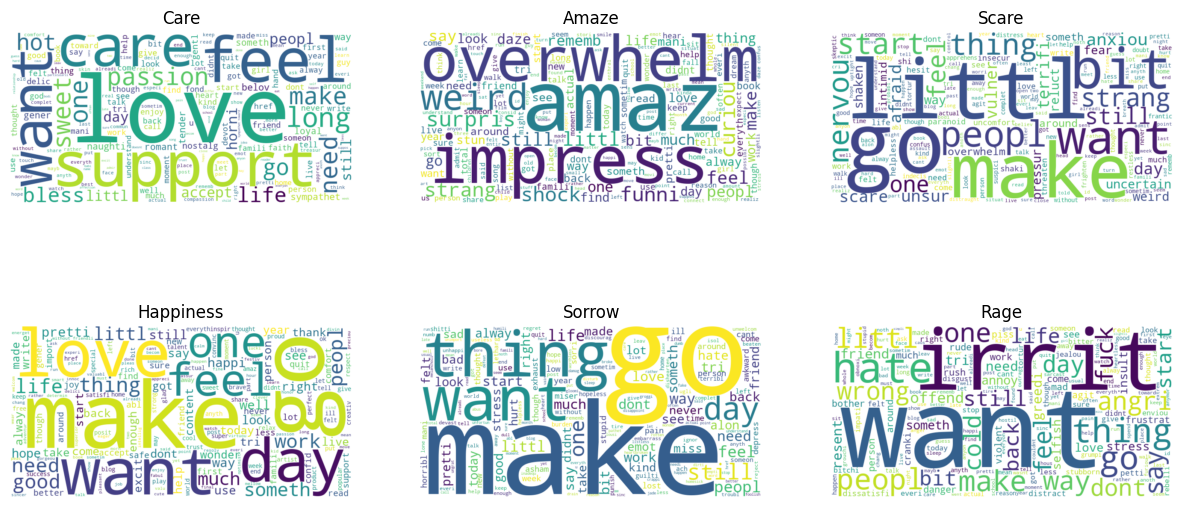

In [15]:
#join different emotion sentences together
sorrow_text = " ".join(emotion_det_df[emotion_det_df['Emotion'] == 'sorrow']['Text'])
rage_text = " ".join(emotion_det_df[emotion_det_df['Emotion'] == 'rage']['Text'])
care_text = " ".join(emotion_det_df[emotion_det_df['Emotion'] == 'care']['Text'])
amaze_text = " ".join(emotion_det_df[emotion_det_df['Emotion'] == 'amaze']['Text'])
scare_text = " ".join(emotion_det_df[emotion_det_df['Emotion'] == 'scare']['Text'])
happiness_text = " ".join(emotion_det_df[emotion_det_df['Emotion'] == 'happiness']['Text'])

# Generate word clouds 
wordcloud_sorrow = WordCloud(width=800, height=400, background_color='white').generate(sorrow_text)
wordcloud_rage = WordCloud(width=800, height=400, background_color='white').generate(rage_text)
wordcloud_care = WordCloud(width=800, height=400, background_color='white').generate(care_text)
wordcloud_amaze = WordCloud(width=800, height=400, background_color='white').generate(amaze_text)
wordcloud_scare = WordCloud(width=800, height=400, background_color='white').generate(scare_text)
wordcloud_happiness = WordCloud(width=800, height=400, background_color='white').generate(happiness_text)

# Plot word clouds
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

axes[0, 0].imshow(wordcloud_care, interpolation='bilinear')
axes[0, 0].set_title('Care')
axes[0, 0].axis('off')

axes[0, 1].imshow(wordcloud_amaze, interpolation='bilinear')
axes[0, 1].set_title('Amaze')
axes[0, 1].axis('off')

axes[0, 2].imshow(wordcloud_scare, interpolation='bilinear')
axes[0, 2].set_title('Scare')
axes[0, 2].axis('off')

axes[1, 0].imshow(wordcloud_happiness, interpolation='bilinear')
axes[1, 0].set_title('Happiness')
axes[1, 0].axis('off')

axes[1, 1].imshow(wordcloud_sorrow, interpolation='bilinear')
axes[1, 1].set_title('Sorrow')
axes[1, 1].axis('off')

axes[1, 2].imshow(wordcloud_rage, interpolation='bilinear')
axes[1, 2].set_title('Rage')
axes[1, 2].axis('off')


plt.show()



Based on the word cloud analysis:

Care: Words such as "support," "love," and "bless" suggest sentiments related to care and positiv.                                                   ty.
Amaze: Words like "impress," "overwhelm," and "surprise" indicate emotions of wonder and astonishment.
Scare: Terms such as "scare," "nervous," and "insecure" reflect feelings of fear and anxiety.
Happiness: Words like "love," "happy," "good," and "glad" signify positive emotions associated with joy and contentment.
Sorrow: Terms such as "bad" and "hate" imply feelings of sadness and negativity.
Rage: Words like "irritate," "hate," "fuck," and "angry" indicate intense emotions of anger and frustration.

**Encode 'Emotion' column using Label Encoding**

In [29]:
le=LabelEncoder()
emotion_det_df['Emotion']=le.fit_transform(emotion_det_df['Emotion'])
emotion_det_df.head()

,Text,Emotion
0,didnt humili,5
1,go hopeless damn hope around someon care awak,5
2,grab minut post greedi wrong,3
3,ever nostalg fireplac still properti,1
4,grouchi,3


In [30]:
#set X and y variable
X=emotion_det_df[['Text']]
y=emotion_det_df[['Emotion']]

In [32]:
#split into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [33]:
#Working on imbalance emotions using oversampling technique

random_oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = random_oversampler.fit_resample(X_train, y_train)   # Resample the training data

**Use CountVectorizer and TfidfVectorizer to convert to numerical features**

In [35]:

# Define vectorizers
vectorizers = [
    ('CountVectorizer', CountVectorizer()),
    ('TfidfVectorizer', TfidfVectorizer())
]


In [81]:
#for LDA
vec = CountVectorizer()
X_LDA = vec.fit_transform(X['Text'])

>We will define a pipeline incorporating the above techniques, utilizing them within our model for comparative analysis in section 4

# Question 3 - LDA(10 points)

- Apply Latent Dirichlet Allocation (LDA) to uncover themes in the text data. Set the number of topics to 8 and extract 10 keywords per topic. 
- Describe your approach, including any preprocessing steps. Present the identified topics with their keywords. 
- Discuss the importance of topic modeling in revealing hidden themes and extracting insights from the dataset.

In [82]:

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=0)

document_topics = lda.fit_transform(X_LDA)
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vec.get_feature_names_out())
print(feature_names)

(10, 10041)


array([[0.03333333, 0.03333417, 0.03334442, ..., 0.03333402, 0.03333333,
        0.03333493],
       [0.54864628, 0.01111399, 0.01111431, ..., 0.01111197, 0.36244455,
        0.01111478],
       [0.84997383, 0.01667141, 0.016671  , ..., 0.01666853, 0.016667  ,
        0.01666878],
       ...,
       [0.02500381, 0.77495918, 0.02500229, ..., 0.02500058, 0.02501174,
        0.02500529],
       [0.025     , 0.0250009 , 0.7749908 , ..., 0.025     , 0.025     ,
        0.02500108],
       [0.02500111, 0.02500262, 0.02500242, ..., 0.02500115, 0.02500108,
        0.025     ]])

In [88]:
def print_topics(topics, feature_names, sorting, topics_per_chunk, n_words):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        print(these_topics)
        print(*these_topics)
        print(len_this_chunk)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(*feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

print_topics(topics=range(8), feature_names=feature_names, sorting=sorting, topics_per_chunk=4, n_words=10)

range(0, 4)
0 1 2 3
4
topic 0       topic 1       topic 2       topic 3       
--------      --------      --------      --------      
help          go            look          pretti        
alon          year          littl         today         
person        want          peopl         happi         
cant          day           thing         bit           
kind          work          love          someth        
helpless      make          feel          littl         
say           school        bit           good          
burden        week          around        day           
hopeless      thing         say           didnt         
could         write         want          way           


range(4, 8)
4 5 6 7
4
topic 4       topic 5       topic 6       topic 7       
--------      --------      --------      --------      
go            http          hate          one           
better        href          need          still         
back          sleep         littl         

# Question 4 - Modeling (20 points)

- Train at least three different  models.
- Choose the best feature engineering method and perform grid search & cross-validation to tune hyperparameters for three different models, optimizing their performance for emotion classification and Also, for each model, plot the ROC-AUC curve?

### Logistic Regression

In [36]:
logistic_regression = LogisticRegression(max_iter=1000)
pipelines = []
for vectorizer_name, vectorizer in vectorizers:    #vectorizers is defined in section 2
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('model', logistic_regression)
    ])
    pipelines.append((vectorizer_name, pipeline))

param_grid = {
    'model__C': [0.01, 0.1, 1,10],
    'vectorizer__max_features': [1000, 5000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for pipeline_name, pipeline in pipelines:
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X_train_resampled.values.ravel(), y_train_resampled.values.ravel())
    results.append((pipeline_name, grid_search))

# Print results
for pipeline_name, result in results:
    print(f"Results for {pipeline_name}:")
    print("Best parameters:", result.best_params_)
    print("Best score:", result.best_score_)
    print("\n")


Results for CountVectorizer:
Best parameters: {'model__C': 10, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}
Best estimators: 0.9471671192360027


Results for TfidfVectorizer:
Best parameters: {'model__C': 10, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}
Best estimators: 0.9488472903828971




In [38]:
best_linear_model = results[1][1].best_estimator_
best_linear_model

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=5000)),
                ('model', LogisticRegression(C=10, max_iter=1000))])

In [39]:


best_linear_model.fit(X_train_resampled.values.ravel(), y_train_resampled.values.ravel())

cv_results_linear = cross_val_score(best_linear_model, X_train_resampled.values.ravel(), y_train_resampled.values.ravel(), cv=cv, scoring='accuracy')
print("Cross-validation Score:", cv_results_linear.mean())

y_pred = best_linear_model.predict(X_test.values.ravel())
test_accuracy_lin =accuracy_score(y_test.values.ravel(), y_pred)
print("Test  Accuracy:", test_accuracy_lin)

# Print classification report
print("Classification report:")
print(classification_report(y_test, y_pred))


Cross-validation Score: 0.9488472903828971
Test  Accuracy: 0.8415555555555555
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       182
           1       0.67      0.72      0.70       352
           2       0.86      0.88      0.87      1463
           3       0.85      0.82      0.83       625
           4       0.80      0.81      0.80       539
           5       0.90      0.88      0.89      1339

    accuracy                           0.84      4500
   macro avg       0.80      0.80      0.80      4500
weighted avg       0.84      0.84      0.84      4500



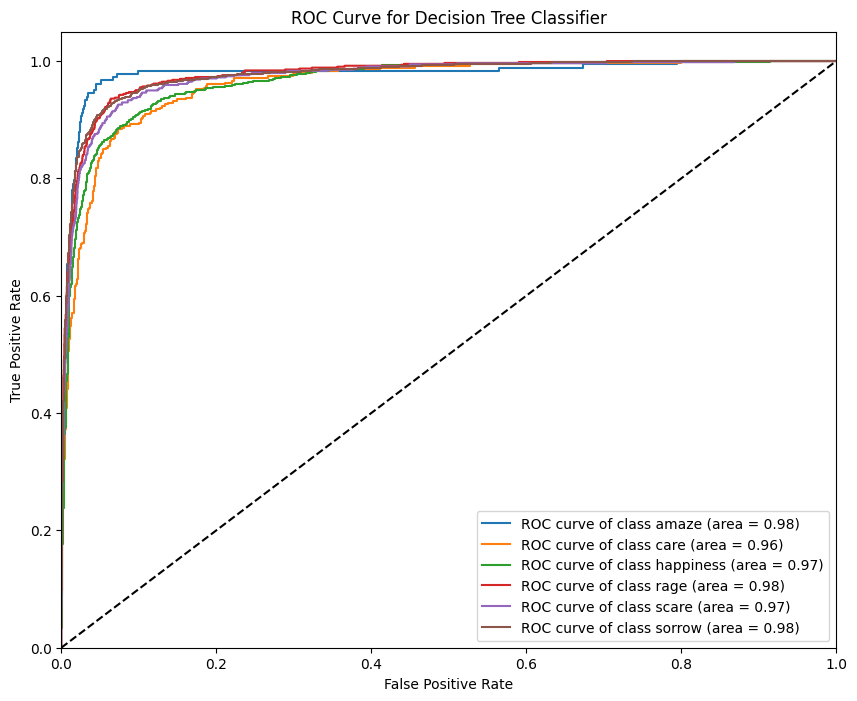

In [95]:
##ROC curve
y_score = best_linear_model.predict_proba(X_test.values.ravel())

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(emo[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

### Random forest

In [40]:

random_forest = RandomForestClassifier()

pipelines_rf = []
for vectorizer_name, vectorizer in vectorizers:
    pipeline_rf = Pipeline([
        ('vectorizer', vectorizer),
        ('model', random_forest)
    ])
    pipelines_rf.append((vectorizer_name, pipeline_rf))

param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 10],
    'vectorizer__max_features': [1000, 5000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)]
}

results_rf = []
for pipeline_name, pipeline_rf in pipelines_rf:
    grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=cv, scoring='accuracy')
    grid_search_rf.fit(X_train_resampled.values.ravel(), y_train_resampled.values.ravel())
    results_rf.append((pipeline_name, grid_search_rf))

for pipeline_name, result_rf in results_rf:
    print(f"Results for {pipeline_name}:")
    print("Best parameters:", result_rf.best_params_)
    print("Best score:", result_rf.best_score_)
    print("\n")


Results for CountVectorizer:
Best parameters: {'model__max_depth': 10, 'model__n_estimators': 200, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}
Best score: 0.8202181153695159


Results for TfidfVectorizer:
Best parameters: {'model__max_depth': 10, 'model__n_estimators': 200, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}
Best score: 0.825445489942833




In [41]:
best_rf_model = results_rf[1][1].best_estimator_
best_rf_model

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=5000)),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=200))])

In [42]:


best_rf_model.fit(X_train_resampled.values.ravel(), y_train_resampled.values.ravel())

cv_results_rf = cross_val_score(best_rf_model, X_train_resampled.values.ravel(), y_train_resampled.values.ravel(), cv=cv, scoring='accuracy')
print("Cross-validation Score:", cv_results_rf.mean())

y_pred_rf = best_rf_model.predict(X_test.values.ravel())
test_accuracy_rf = accuracy_score(y_test.values.ravel(), y_pred_rf)
print("Test Accuracy:", test_accuracy_rf)

print("Classification report:")
print(classification_report(y_test, y_pred_rf))


Cross-validation Score: 0.8218051009745986
Test Accuracy: 0.7517777777777778
Classification report:
              precision    recall  f1-score   support

           0       0.62      0.97      0.76       182
           1       0.52      0.84      0.64       352
           2       0.72      0.80      0.76      1463
           3       0.83      0.79      0.81       625
           4       0.82      0.71      0.77       539
           5       0.90      0.65      0.75      1339

    accuracy                           0.75      4500
   macro avg       0.73      0.79      0.75      4500
weighted avg       0.78      0.75      0.75      4500



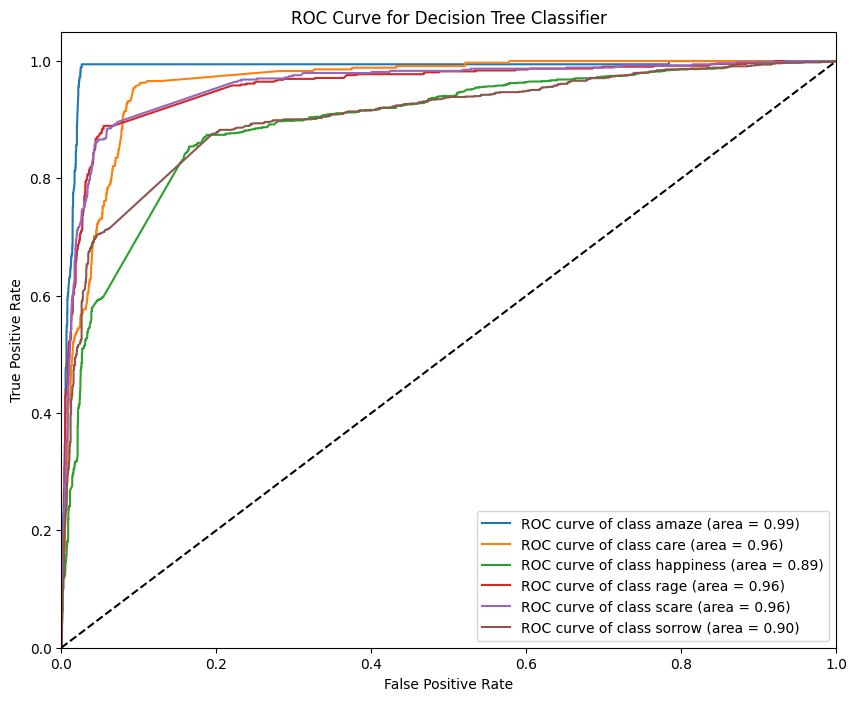

In [97]:

y_score = best_rf_model.predict_proba(X_test.values.ravel())
emo=np.unique(emotion_len_df['Emotion'])
num_classes = len(np.unique(emotion_len_df['Emotion']))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(emo[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

### XGboost

In [43]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgboost_classifier = XGBClassifier()

pipelines_xgb = []
for vectorizer_name, vectorizer in vectorizers:
    pipeline_xgb = Pipeline([
        ('vectorizer', vectorizer),
        ('model', xgboost_classifier)
    ])
    pipelines_xgb.append((vectorizer_name, pipeline_xgb))

param_grid_xgb = {
    'model__learning_rate': [0.1, 0.01],
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'vectorizer__max_features': [1000, 5000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)]
}

results_xgb = []
for pipeline_name, pipeline_xgb in pipelines_xgb:
    grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=cv, scoring='accuracy')
    grid_search_xgb.fit(X_train_resampled.values.ravel(), y_train_resampled.values.ravel())
    results_xgb.append((pipeline_name, grid_search_xgb))

for pipeline_name, result_xgb in results_xgb:
    print(f"Results for {pipeline_name}:")
    print("Best parameters:", result_xgb.best_params_)
    print("Best score:", result_xgb.best_score_)
    print("\n")


Results for CountVectorizer:
Best parameters: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}
Best score: 0.9096892817024956


Results for TfidfVectorizer:
Best parameters: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 2)}
Best score: 0.9172034863175593




In [44]:
best_xgb_model = results_xgb[1][1].best_estimator_
best_xgb_model


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [45]:
best_xgb_model.fit(X_train_resampled.values.ravel(), y_train_resampled.values.ravel())

cv_results_xgb = cross_val_score(best_xgb_model, X_train_resampled.values.ravel(), y_train_resampled.values.ravel(), cv=cv, scoring='accuracy')
print("Cross-validation Score:", cv_results_xgb.mean())

y_pred_xgb = best_xgb_model.predict(X_test.values.ravel())
test_accuracy_xgb = accuracy_score(y_test.values.ravel(), y_pred_xgb)
print("Test Accuracy:", test_accuracy_xgb)

print("Classification report:")
print(classification_report(y_test, y_pred_xgb))


Cross-validation Score: 0.9172034863175593
Test Accuracy: 0.8484444444444444
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       182
           1       0.61      0.87      0.71       352
           2       0.89      0.84      0.86      1463
           3       0.86      0.87      0.86       625
           4       0.80      0.85      0.83       539
           5       0.95      0.85      0.90      1339

    accuracy                           0.85      4500
   macro avg       0.80      0.84      0.82      4500
weighted avg       0.86      0.85      0.85      4500



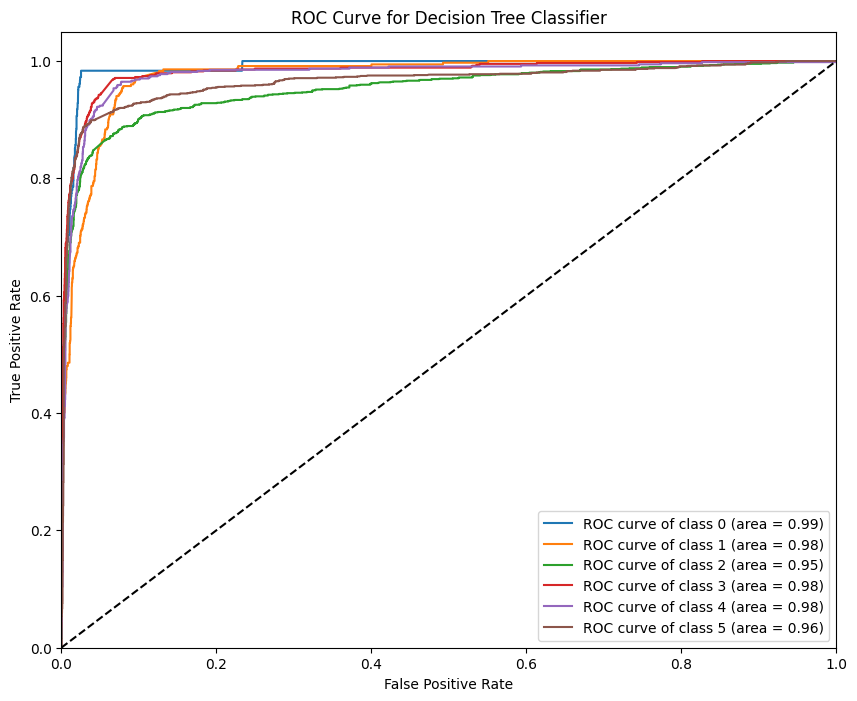

In [98]:

y_score = best_xgb_model.predict_proba(X_test.values.ravel())
emo=np.unique(emotion_len_df['Emotion'])
num_classes = len(np.unique(emotion_len_df['Emotion']))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

# Question 5 - Evaluation and Reporting (20 points)

- Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions


>Based on the results above, XGBoost appears to be the best-performing model overall. It has the highest test accuracy of 84.8 %, and the highest F1-score (weighted average). Therefore, XGBoost is likely the best model for this particular classification task.

In [132]:
#Applying Xgboost
y_pred_xgb = best_xgb_model.predict(X_test.values.ravel())
test_accuracy_xgb = accuracy_score(y_test.values.ravel(), y_pred_xgb)
print("Test Accuracy:", test_accuracy_xgb)
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))

Test Accuracy: 0.8484444444444444
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       182
           1       0.61      0.87      0.71       352
           2       0.89      0.84      0.86      1463
           3       0.86      0.87      0.86       625
           4       0.80      0.85      0.83       539
           5       0.95      0.85      0.90      1339

    accuracy                           0.85      4500
   macro avg       0.80      0.84      0.82      4500
weighted avg       0.86      0.85      0.85      4500



# Question 6 : External validation (30 pt)

- A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.
- You need to generate a csv file, named as "submission.csv". This is the inference values from your selected best model on "test.csv" data.

In [124]:
test_df=pd.read_csv('C:\\Users\\kumarip\\Documents\\Priya\\final\\final\\Problem2\\data\\test.csv')
test_df.head()

,Text
0,i also feel contented and humbled by this expe...
1,i t want t know f t habitual t feel frightened...
2,i feel so spiteful towards people sometimes ju...
3,i wasn t feeling hot i knew that i needed to c...
4,i feel more anxious than i have in quite some ...


In [125]:
test_df['Text'] = test_df['Text'].apply(clean_text)
test_df.head()

,Text
0,i also feel contented and humbled by this expe...
1,i t want t know f t habitual t feel frightened...
2,i feel so spiteful towards people sometimes ju...
3,i wasn t feeling hot i knew that i needed to c...
4,i feel more anxious than i have in quite some ...


In [126]:
test_df['Text'] = test_df['Text'].apply(remove_stopwords, args=(tokenizer, stopword_list))

In [127]:
test_df['Text'] = test_df['Text'].apply(stem_text, args=(tokenizer, stopword_list, stemmer))

In [128]:
test_df_text=test_df[['Text']]

In [129]:
test_df_text.head()

,Text
0,also content humbl experi alway thank opportun
1,want f habitu frighten wh n initi r career
2,spite toward peopl sometim way look make want ...
3,hot knew need cool bodi temperatur drink fluid
4,anxiou quit fact


In [130]:

def generate_result(model):
  test_predictions = model.predict(test_df_text.values.ravel())
  submission_df = pd.DataFrame(le.inverse_transform(test_predictions), index=test_df_text.index)
  submission_df.to_csv('./submission.csv',index = False)

generate_result(xgb_classifier)

# Hint - Final evaluation metrics
Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.

In [ ]:
from sklearn.metrics import balanced_accuracy_score

def evaluation_metrics(y_test, y_pred):
    # Calculate the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Return the balanced accuracy as a single digit number
    print('The Balanced accuracy is : ', balanced_accuracy)